In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
import os
import random
import numpy as np
import matplotlib.pyplot as plt


os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11490434/11490434 [==============================] - 2s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [4]:
x_train = x_train.reshape(-1, 28,28) / 255.0
x_test = x_test.reshape(-1, 28,28)/ 255.0

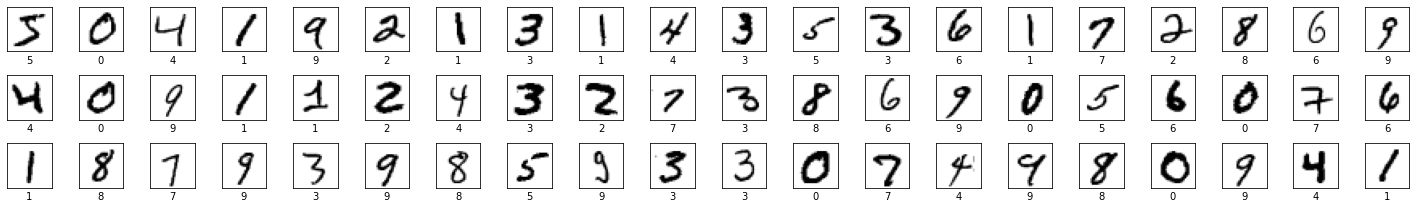

In [5]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

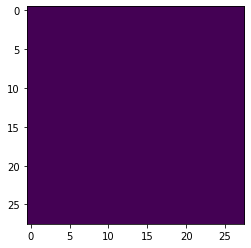

In [7]:
mean_img = np.mean(x_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [8]:
x_train_norm, x_test_norm = x_train-mean_img, x_test-mean_img

In [9]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28, 28, 1)),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 96)          11712     
                                                                 
 activation (Activation)     (None, 7, 7, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 4, 4, 96)         384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 activation_1 (Activation)   (None, 4, 4, 256)         0

In [10]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
h = model.fit(x=x_train_norm, y=y_train, epochs=5, batch_size=150, validation_data=(x_test_norm, y_test))

Epoch 1/5
400/400 [==============================] - 24s 23ms/step - loss: 0.2342 - accuracy: 0.9368 - val_loss: 1.5938 - val_accuracy: 0.6641
Epoch 2/5
400/400 [==============================] - 9s 21ms/step - loss: 0.0941 - accuracy: 0.9725 - val_loss: 0.1365 - val_accuracy: 0.9640
Epoch 3/5
400/400 [==============================] - 9s 21ms/step - loss: 0.0729 - accuracy: 0.9791 - val_loss: 0.0757 - val_accuracy: 0.9811
Epoch 4/5
400/400 [==============================] - 8s 21ms/step - loss: 0.0602 - accuracy: 0.9826 - val_loss: 0.0828 - val_accuracy: 0.9786
Epoch 5/5
400/400 [==============================] - 9s 22ms/step - loss: 0.0554 - accuracy: 0.9847 - val_loss: 0.0612 - val_accuracy: 0.9836


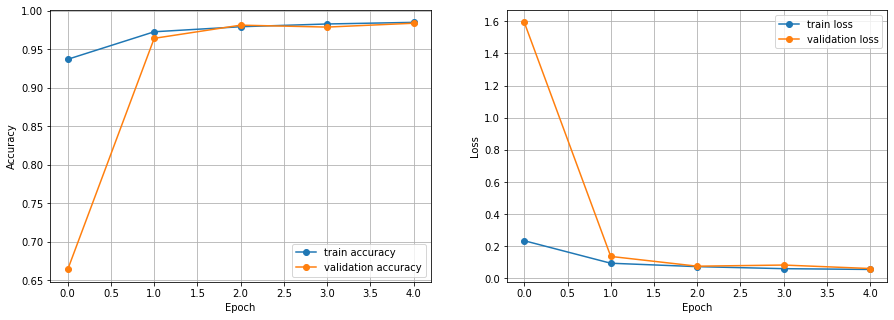

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [13]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [14]:
s = model.fit(x=x_train_norm, y=y_train, epochs=5, batch_size=150, validation_data=(x_test_norm, y_test))

Epoch 1/5
400/400 [==============================] - 11s 22ms/step - loss: 0.0239 - accuracy: 0.9928 - val_loss: 0.0364 - val_accuracy: 0.9895
Epoch 2/5
400/400 [==============================] - 8s 21ms/step - loss: 0.0159 - accuracy: 0.9953 - val_loss: 0.0351 - val_accuracy: 0.9892
Epoch 3/5
400/400 [==============================] - 8s 21ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 4/5
400/400 [==============================] - 9s 21ms/step - loss: 0.0113 - accuracy: 0.9968 - val_loss: 0.0343 - val_accuracy: 0.9895
Epoch 5/5
400/400 [==============================] - 8s 21ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.0344 - val_accuracy: 0.9898


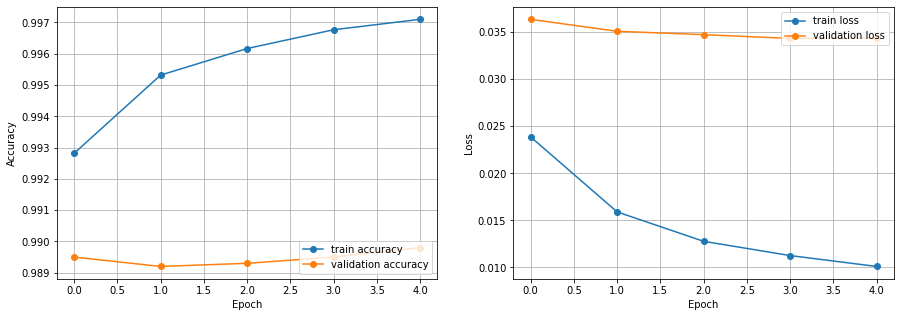

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(s.history['accuracy'], 'o-', label='train accuracy')
plt.plot(s.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(s.history['loss'], 'o-', label='train loss')
plt.plot(s.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [16]:
model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [17]:
r = model.fit(x=x_train_norm, y=y_train, epochs=5, batch_size=150, validation_data=(x_test_norm, y_test))

Epoch 1/5
400/400 [==============================] - 12s 22ms/step - loss: 0.0739 - accuracy: 0.9791 - val_loss: 0.0729 - val_accuracy: 0.9827
Epoch 2/5
400/400 [==============================] - 8s 21ms/step - loss: 0.0553 - accuracy: 0.9843 - val_loss: 0.0853 - val_accuracy: 0.9814
Epoch 3/5
400/400 [==============================] - 8s 21ms/step - loss: 0.0459 - accuracy: 0.9873 - val_loss: 0.0835 - val_accuracy: 0.9786
Epoch 4/5
400/400 [==============================] - 8s 21ms/step - loss: 0.0374 - accuracy: 0.9894 - val_loss: 0.0530 - val_accuracy: 0.9863
Epoch 5/5
400/400 [==============================] - 9s 22ms/step - loss: 0.0326 - accuracy: 0.9908 - val_loss: 0.0597 - val_accuracy: 0.9865


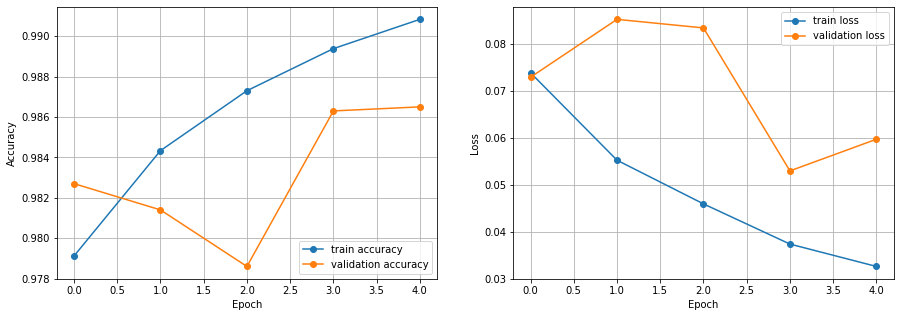

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(r.history['accuracy'], 'o-', label='train accuracy')
plt.plot(r.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(r.history['loss'], 'o-', label='train loss')
plt.plot(r.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

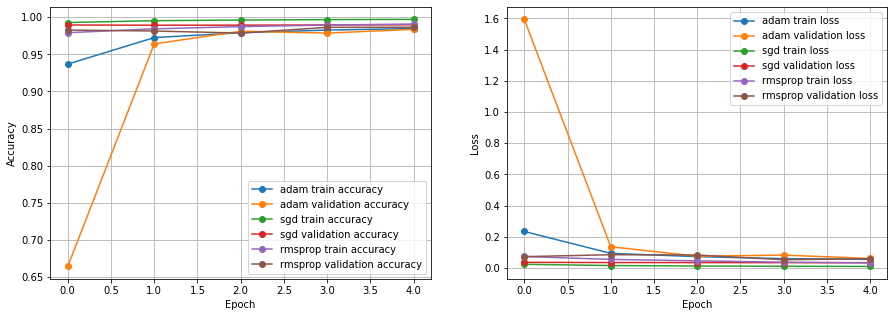

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='adam train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'adam validation accuracy')
plt.plot(s.history['accuracy'], 'o-', label='sgd train accuracy')
plt.plot(s.history['val_accuracy'], 'o-', label = 'sgd validation accuracy')
plt.plot(r.history['accuracy'], 'o-', label='rmsprop train accuracy')
plt.plot(r.history['val_accuracy'], 'o-', label = 'rmsprop validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='adam train loss')
plt.plot(h.history['val_loss'], 'o-', label='adam validation loss')
plt.plot(s.history['loss'], 'o-', label='sgd train loss')
plt.plot(s.history['val_loss'], 'o-', label='sgd validation loss')
plt.plot(r.history['loss'], 'o-', label='rmsprop train loss')
plt.plot(r.history['val_loss'], 'o-', label='rmsprop validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()